In [23]:
import sys
import time

import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
import wmfdata as wmf

In [24]:
%matplotlib inline
# Customize Matplotlib styles
mpl.rcParams["font.size"] = 15
mpl.rcParams["figure.figsize"] = (16, 10)

In [13]:
# The time range for which to update. START is included, END is excluded.
START = "201804"
END = "201805"

In [15]:
all_wikis = wmf.utils.list_wikis()

In [16]:
isolate = "set session transaction isolation level read uncommitted;"

use_db = "use {db};"

editor_month = """
insert into staging.editor_month
select
  database() as wiki,
  str_to_date(concat(rev_month, "01"), "%Y%m%d") as month,
  local_user_id,
  ifnull(user_name, "") as user_name,
  ifnull(sum(edits), 0) as edits,
  ifnull(sum(content_edits), 0) as content_edits,
  ifnull(sum(edits * deleted), 0) as deleted_edits,
  ifnull(sum(mobile_web_edits), 0) as mobile_web_edits,
  ifnull(sum(mobile_app_edits), 0) as mobile_app_edits,
  ifnull(sum(visual_edits), 0) as visual_edits,
  ifnull(sum(ve_source_edits), 0) as ve_source_edits,
  if(ug_group = "bot" or ufg_group = "bot", 1, 0) as bot_flag,
  str_to_date(user_registration, "%Y%m%d%H%i%S") as user_registration
from
(
select
  left(rev_timestamp, 6) as `rev_month`,
  rev_user as `local_user_id`,
  count(*) as `edits`,
  sum(page_namespace = 0 or cn.namespace is not null) as content_edits,
  sum(
    ts_tags like "%mobile edit%" and
    (ts_tags like "%mobile web edit%" or ts_tags not like "%mobile app edit%")
  ) as mobile_web_edits,
  sum(ts_tags like "%mobile app edit%") as mobile_app_edits,
  sum(ts_tags like "%visualeditor%" and ts_tags not like "%visualeditor-wikitext%") as visual_edits,
  sum(ts_tags like "%visualeditor-wikitext%") as ve_source_edits,
  0 as `deleted`
from revision
left join page on rev_page = page_id
left join tag_summary on rev_id = ts_rev_id
left join datasets.content_namespaces cn on database() = wiki and page_namespace = namespace
where rev_timestamp >= "{start}" and rev_timestamp < "{end}"
group by left(rev_timestamp, 6), rev_user

union all

select
  left(ar_timestamp, 6) as `rev_month`,
  ar_user as `local_user_id`,
  count(*) as `edits`,
  sum(ar_namespace = 0 or cn.namespace is not null) as content_edits,
  sum(
    ts_tags like "%mobile edit%" and
    (ts_tags like "%mobile web edit%" or ts_tags not like "%mobile app edit%")
  ) as mobile_web_edits,
  sum(ts_tags like "%mobile app edit%") as mobile_app_edits,
  sum(ts_tags like "%visualeditor%" and ts_tags not like "%visualeditor-wikitext%") as visual_edits,
  sum(ts_tags like "%visualeditor-wikitext%") as ve_source_edits,
  1 as `deleted`
from archive
left join tag_summary on ar_rev_id = ts_rev_id
left join datasets.content_namespaces cn on database() = wiki and ar_namespace = namespace
where ar_timestamp >= "{start}" and ar_timestamp < "{end}"
group by left(ar_timestamp, 6), ar_user
) revs
left join user on local_user_id = user_id
left join user_groups on local_user_id = ug_user and ug_group = "bot"
left join user_former_groups on local_user_id = ufg_user and ufg_group = "bot"
group by month, local_user_id;
"""

In [18]:
for wiki in all_wikis:
    init = time.perf_counter()
    wmf.mariadb.run(
        isolate,
        use_db.format(db = wiki),
        editor_month.format(start = START, end = END)
    )
    elapsed = time.perf_counter() - init
    wmf.utils.print_err("{} completed in {:0.0f} s".format(wiki, elapsed))

aawiki completed in 0 s
aawikibooks completed in 0 s
aawiktionary completed in 0 s
abwiki completed in 2 s
abwiktionary completed in 0 s
acewiki completed in 1 s
adywiki completed in 0 s
afwiki completed in 1 s
afwikibooks completed in 0 s
afwikiquote completed in 0 s
afwiktionary completed in 0 s
akwiki completed in 0 s
akwikibooks completed in 0 s
akwiktionary completed in 0 s
alswiki completed in 1 s
alswikibooks completed in 0 s
alswikiquote completed in 0 s
alswiktionary completed in 0 s
amwiki completed in 0 s
amwikiquote completed in 0 s
amwiktionary completed in 0 s
angwiki completed in 0 s
angwikibooks completed in 0 s
angwikiquote completed in 0 s
angwikisource completed in 0 s
angwiktionary completed in 0 s
anwiki completed in 1 s
anwiktionary completed in 0 s
arcwiki completed in 0 s
arwiki completed in 207 s
arwikibooks completed in 0 s
arwikinews completed in 0 s
arwikiquote completed in 0 s
arwikisource completed in 0 s
arwikiversity completed in 0 s
arwiktionary complet

htwiki completed in 0 s
htwikisource completed in 0 s
huwiki completed in 20 s
huwikibooks completed in 1 s
huwikinews completed in 0 s
huwikiquote completed in 0 s
huwikisource completed in 0 s
huwiktionary completed in 1 s
hywiki completed in 4 s
hywikibooks completed in 0 s
hywikiquote completed in 2 s
hywikisource completed in 0 s
hywiktionary completed in 3 s
hzwiki completed in 0 s
iawiki completed in 1 s
iawikibooks completed in 0 s
iawiktionary completed in 0 s
idwiki completed in 14 s
idwikibooks completed in 0 s
idwikiquote completed in 0 s
idwikisource completed in 1 s
idwiktionary completed in 0 s
iewiki completed in 0 s
iewikibooks completed in 0 s
iewiktionary completed in 0 s
igwiki completed in 0 s
iiwiki completed in 0 s
ikwiki completed in 0 s
ikwiktionary completed in 0 s
ilowiki completed in 0 s
incubatorwiki completed in 8 s
inhwiki completed in 0 s
iowiki completed in 0 s
iowiktionary completed in 1 s
iswiki completed in 1 s
iswikibooks completed in 0 s
iswikiquot

rowikisource completed in 1 s
rowikivoyage completed in 0 s
rowiktionary completed in 0 s
ruewiki completed in 0 s
ruwiki completed in 95 s
ruwikibooks completed in 0 s
ruwikinews completed in 1 s
ruwikiquote completed in 0 s
ruwikisource completed in 4 s
ruwikiversity completed in 0 s
ruwikivoyage completed in 1 s
ruwiktionary completed in 6 s
rwwiki completed in 0 s
rwwiktionary completed in 0 s
sahwiki completed in 0 s
sahwikisource completed in 0 s
sawiki completed in 0 s
sawikibooks completed in 0 s
sawikiquote completed in 0 s
sawikisource completed in 0 s
sawiktionary completed in 1 s
scnwiki completed in 0 s
scnwiktionary completed in 0 s
scowiki completed in 1 s
scwiki completed in 0 s
scwiktionary completed in 0 s
sdwiki completed in 1 s
sdwikinews completed in 0 s
sdwiktionary completed in 0 s
sewiki completed in 1 s
sewikibooks completed in 0 s
sgwiki completed in 0 s
sgwiktionary completed in 0 s
shwiki completed in 5 s
shwiktionary completed in 0 s
simplewiki completed in

# Quality checks

In [19]:
wmf.mariadb.run("""select month, count(*) from editor_month where month >= "2017-01-01" group by month""")

,month,count(*)
0,2017-01-01,393795
1,2017-02-01,380416
2,2017-03-01,407496
3,2017-04-01,383681
4,2017-05-01,389033
5,2017-06-01,362528
6,2017-07-01,354429
7,2017-08-01,357186
8,2017-09-01,362564
9,2017-10-01,380788


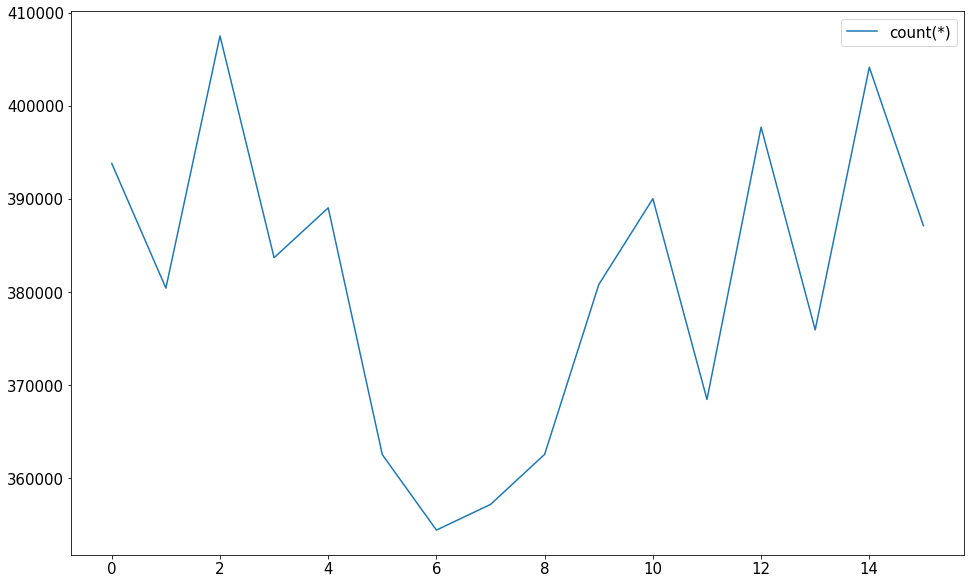

In [25]:
_19.plot()

In [20]:
wmf.mariadb.run("""
    select month, count(*) 
    from editor_month 
    where month >= "2017-01-01" and content_edits >= 100
    group by month
""")

,month,count(*)
0,2017-01-01,15738
1,2017-02-01,14796
2,2017-03-01,15646
3,2017-04-01,15022
4,2017-05-01,15111
5,2017-06-01,14462
6,2017-07-01,15132
7,2017-08-01,15139
8,2017-09-01,14917
9,2017-10-01,15247


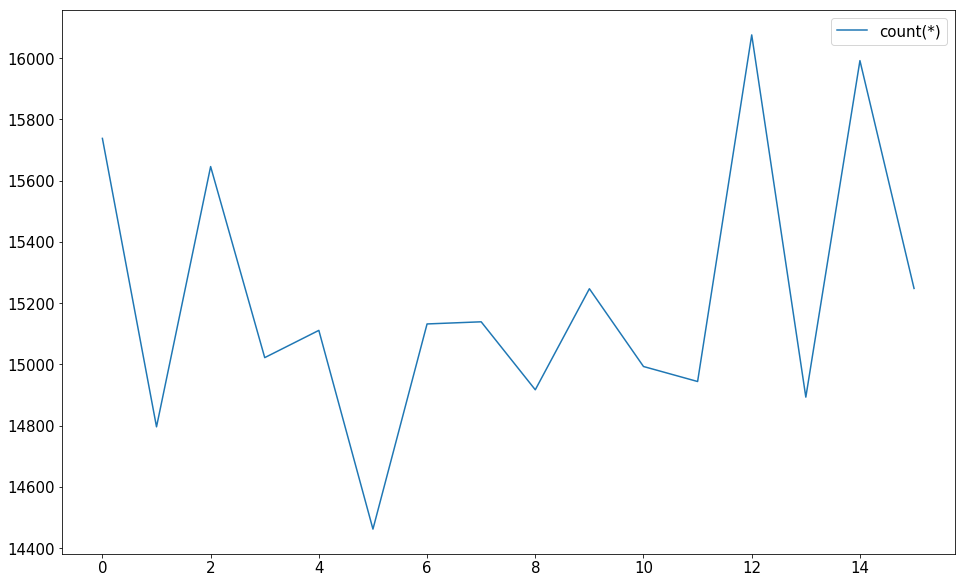

In [31]:
_20.plot();

In [29]:
wmf.mariadb.run("""
    select month, wiki, count(*) 
    from editor_month 
    where month >= "2017-11-01" and wiki in ("arwiki", "dewiki", "kowiki", "zhwiki")
    group by wiki, month
""")

,month,wiki,count(*)
0,2017-11-01,arwiki,4659
1,2017-12-01,arwiki,5061
2,2018-01-01,arwiki,4823
3,2018-02-01,arwiki,4674
4,2018-03-01,arwiki,5301
5,2018-04-01,arwiki,5363
6,2017-11-01,dewiki,20392
7,2017-12-01,dewiki,19110
8,2018-01-01,dewiki,21971
9,2018-02-01,dewiki,19548
